# Imports and set up

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import glob

In [2]:
WORKING_DIR = '/home/projects/genomics'
DATA_DIR = '/home/projects/genomics/sample_mapping'
CONCATED_DF_PATH = '/home/projects/genomics/active_sites_concated.csv'
FILES_DF_PATH = '/home/projects/genomics/active_sites_id_index.csv'

# Get the data

WARNING: I will get and concat all the data files later, after filtering `files_df`

### Dataframe of files

In [3]:
filenames = [os.path.basename(x) for x in glob.glob(DATA_DIR + '/*')]

files_df = pd.DataFrame(filenames, columns=['file_name'])

# Extract info from filenames

In [4]:
files_df.head()

,file_name
0,ENSP00000005259.4_4w80_D_SO4
1,ENSP00000080059.7_3znr_B_ZN
2,ENSP00000023897.6_6i53_D_NAG
3,ENSP00000164139.3_1p4h_A_PO4
4,ENSP00000164139.3_2g9r_A_G27


In [5]:
files_df['ensp_id'] = files_df.apply(lambda row: row['file_name'].split('.')[0], axis='columns')

In [6]:
files_df.head()

,file_name,ensp_id
0,ENSP00000005259.4_4w80_D_SO4,ENSP00000005259
1,ENSP00000080059.7_3znr_B_ZN,ENSP00000080059
2,ENSP00000023897.6_6i53_D_NAG,ENSP00000023897
3,ENSP00000164139.3_1p4h_A_PO4,ENSP00000164139
4,ENSP00000164139.3_2g9r_A_G27,ENSP00000164139


In [7]:
def get_ensp_version(row):
    right_part = row['file_name'].split('.')[1]
    return right_part.split('_')[0]

In [8]:
files_df['ensp_version'] = files_df.apply(get_ensp_version, axis='columns')

In [9]:
def get_pdb_id(row):
    right_part = row['file_name'].split('.')[1]
    return right_part.split('_')[1]

In [10]:
files_df['pdb_id'] = files_df.apply(get_pdb_id, axis='columns')

In [11]:
def get_chain(row):
    right_part = row['file_name'].split('.')[1]
    return right_part.split('_')[2]

In [12]:
files_df['chain'] = files_df.apply(get_chain, axis='columns')

In [13]:
def get_ligand(row):
    right_part = row['file_name'].split('.')[1]
    return right_part.split('_')[3]

In [14]:
files_df['ligand'] = files_df.apply(get_ligand, axis='columns')

In [15]:
files_df.head()

,file_name,ensp_id,ensp_version,pdb_id,chain,ligand
0,ENSP00000005259.4_4w80_D_SO4,ENSP00000005259,4,4w80,D,SO4
1,ENSP00000080059.7_3znr_B_ZN,ENSP00000080059,7,3znr,B,ZN
2,ENSP00000023897.6_6i53_D_NAG,ENSP00000023897,6,6i53,D,NAG
3,ENSP00000164139.3_1p4h_A_PO4,ENSP00000164139,3,1p4h,A,PO4
4,ENSP00000164139.3_2g9r_A_G27,ENSP00000164139,3,2g9r,A,G27


# Check for the same proteins

In [16]:
files_df.head()

,file_name,ensp_id,ensp_version,pdb_id,chain,ligand
0,ENSP00000005259.4_4w80_D_SO4,ENSP00000005259,4,4w80,D,SO4
1,ENSP00000080059.7_3znr_B_ZN,ENSP00000080059,7,3znr,B,ZN
2,ENSP00000023897.6_6i53_D_NAG,ENSP00000023897,6,6i53,D,NAG
3,ENSP00000164139.3_1p4h_A_PO4,ENSP00000164139,3,1p4h,A,PO4
4,ENSP00000164139.3_2g9r_A_G27,ENSP00000164139,3,2g9r,A,G27


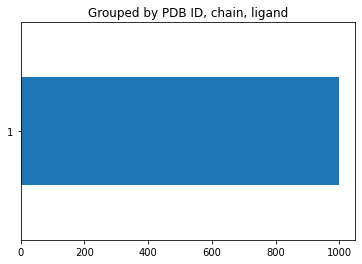

In [17]:
files_df.groupby(['pdb_id', 'chain', 'ligand']).file_name.count().value_counts()[::-1].plot(kind='barh')
plt.title('Grouped by PDB ID, chain, ligand')
plt.show()

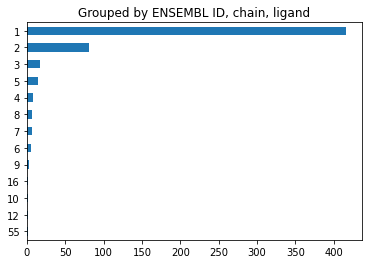

In [18]:
files_df.groupby(['ensp_id', 'chain', 'ligand']).file_name.count().value_counts()[::-1].plot(kind='barh')
plt.title('Grouped by ENSEMBL ID, chain, ligand')
plt.show()

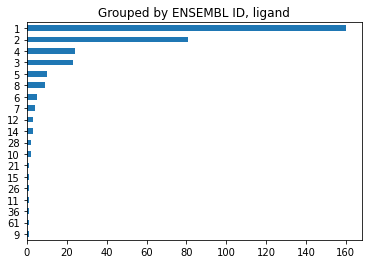

In [19]:
files_df.groupby(['ensp_id', 'ligand']).file_name.count().value_counts()[::-1].plot(kind='barh')
plt.title('Grouped by ENSEMBL ID, ligand')
plt.show()

For now we are not taking chain int account (we just chose random chain):

In [20]:
files_df.drop_duplicates(subset=['ensp_id', 'ligand'])

,file_name,ensp_id,ensp_version,pdb_id,chain,ligand
0,ENSP00000005259.4_4w80_D_SO4,ENSP00000005259,4,4w80,D,SO4
1,ENSP00000080059.7_3znr_B_ZN,ENSP00000080059,7,3znr,B,ZN
2,ENSP00000023897.6_6i53_D_NAG,ENSP00000023897,6,6i53,D,NAG
3,ENSP00000164139.3_1p4h_A_PO4,ENSP00000164139,3,1p4h,A,PO4
4,ENSP00000164139.3_2g9r_A_G27,ENSP00000164139,3,2g9r,A,G27
...,...,...,...,...,...,...
970,ENSP00000023897.6_6x3v_D_V8D,ENSP00000023897,6,6x3v,D,V8D
972,ENSP00000164139.3_1axr_A_HTP,ENSP00000164139,3,1axr,A,HTP
983,ENSP00000011292.3_3fju_A_NA,ENSP00000011292,3,3fju,A,NA
989,ENSP00000164139.3_1wv0_A_BN4,ENSP00000164139,3,1wv0,A,BN4


In [21]:
selected_structures_df = files_df.drop_duplicates(subset=['ensp_id', 'ligand'])
selected_structures_df.head()

,file_name,ensp_id,ensp_version,pdb_id,chain,ligand
0,ENSP00000005259.4_4w80_D_SO4,ENSP00000005259,4,4w80,D,SO4
1,ENSP00000080059.7_3znr_B_ZN,ENSP00000080059,7,3znr,B,ZN
2,ENSP00000023897.6_6i53_D_NAG,ENSP00000023897,6,6i53,D,NAG
3,ENSP00000164139.3_1p4h_A_PO4,ENSP00000164139,3,1p4h,A,PO4
4,ENSP00000164139.3_2g9r_A_G27,ENSP00000164139,3,2g9r,A,G27


# Concat files with AA positions

###  Import data files to pandas

In [22]:
def read_tsv_dir(dir_name):
    """
    Reads all tsv files in a directory and returns a dict of pandas dataframes (filenames are keys).
    """
    # TODO extensions etc

    df_dict = {}

    for path in glob.glob(dir_name + '/*'):
        columns = ['position_ensp', 'aa_ensp', 'position_pdb', 'aa_pdb']
        file = os.path.basename(path)
        if file in selected_structures_df.file_name.values:
            df_dict[file] = pd.read_csv(path, sep='\t', names=columns)
    
    return df_dict

In [23]:
df_dict = read_tsv_dir(DATA_DIR)

In [24]:
concated_df = None

for filename, df in df_dict.items():

    if concated_df is None:
        concated_df = df
        concated_df['file_name'] = filename
        continue

    df['file_name'] = filename
    concated_df = pd.concat([concated_df, df])

In [25]:
concated_df.head()

,position_ensp,aa_ensp,position_pdb,aa_pdb,file_name
0,185,E,16,E,ENSP00000005259.4_4w80_D_SO4
1,188,K,19,K,ENSP00000005259.4_4w80_D_SO4
2,189,T,20,T,ENSP00000005259.4_4w80_D_SO4
3,192,R,23,R,ENSP00000005259.4_4w80_D_SO4
4,193,K,24,K,ENSP00000005259.4_4w80_D_SO4


### Filter using selected structures

In [26]:
filtered_concated_df = concated_df.query('file_name in @selected_structures_df.file_name')
filtered_concated_df.head()

,position_ensp,aa_ensp,position_pdb,aa_pdb,file_name
0,185,E,16,E,ENSP00000005259.4_4w80_D_SO4
1,188,K,19,K,ENSP00000005259.4_4w80_D_SO4
2,189,T,20,T,ENSP00000005259.4_4w80_D_SO4
3,192,R,23,R,ENSP00000005259.4_4w80_D_SO4
4,193,K,24,K,ENSP00000005259.4_4w80_D_SO4


In [27]:
files_df[files_df.file_name == 'ENSP00000005259.4_4w80_D_SO4']

,file_name,ensp_id,ensp_version,pdb_id,chain,ligand
0,ENSP00000005259.4_4w80_D_SO4,ENSP00000005259,4,4w80,D,SO4


# Ligands EDA

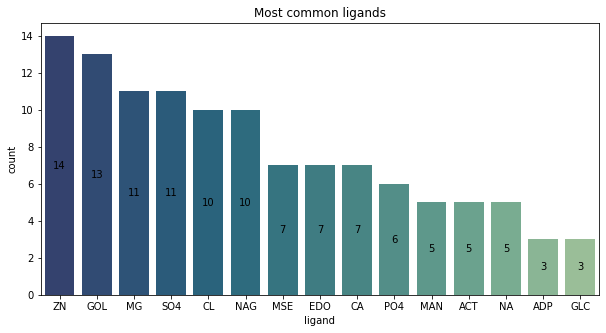

In [28]:
plt.figure(figsize=(10, 5))

ax = sns.countplot(
    x='ligand', data=selected_structures_df,
    palette='crest_r',
    order=selected_structures_df.ligand.value_counts()[:15].index
)

bars = ax.containers[0]

plt.title('Most common ligands')
ax.bar_label(bars, label_type='center')

plt.show()

# Save the results

In [29]:
filtered_concated_df.to_csv(CONCATED_DF_PATH)
selected_structures_df.to_csv(FILES_DF_PATH)